# Анализ: какова рыночная стоимость квартир?
(на примере данных Яндекс.Недвижимости по Санкт-Петербургу)*

## Цель:
определить параметры, влияющие на вычисление стоимости квартиры.

## Шаги:

1. Подготовка данных (пропуски, замены, смена формата данных)

2. Дополнение данных (получение новой, полезной для информации из уже готовых данных)

3. Анализ данных

  3.1. Распределение данных last_price, total_area, rooms, ceiling_height.

  3.2. Распределение данных days_exposition.

  3.3. Графики зависимости last_price от total_area, rooms, cityCenters_nearest, floors, year, month, wday.

  3.4. 10 населенных пунктов, в которых чаще продавалось жилье (дорогие и дешевые квартиры).

  3.5. Выделение радиуса центра Санкт-Петербурга и подходящих данных.

  3.6. Распределение данных last_price, total_area, rooms, ceiling_height и days_exposition для центра Петербурга; графики зависимости last_price от total_area, rooms, cityCenters_nearest, floors, year, month, wday, first_day_exposition для центра Петербурга.

  Вывод.

4. Вывод

  4.1. Количество закрытых объявлений.

  4.2. Параметры, влияющие на цену недвижимости.

##  Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

- balcony — число балконов

- ceiling_height — высота потолков (м)

- cityCenters_nearest — расстояние до центра города (м)

- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

- first_day_exposition — дата публикации

- floor — этаж

- floors_total — всего этажей в доме

- is_apartment — апартаменты (булев тип)

- kitchen_area — площадь кухни в квадратных метрах (м²)

- last_price — цена на момент снятия с публикации

- living_area — жилая площадь в квадратных метрах(м²)

- locality_name — название населённого пункта

- open_plan — свободная планировка (булев тип)

- parks_around3000 — число парков в радиусе 3 

- parks_nearest — расстояние до ближайшего парка (м)

- ponds_around3000 — число водоёмов в радиусе 3 км

- ponds_nearest — расстояние до ближайшего водоёма (м)

- rooms — число комнат

- studio — квартира-студия (булев тип)

- total_area — площадь квартиры в квадратных метрах (м²)

- total_images — число фотографий квартиры в объявлении

## 1. Подготовка данных для работы

In [ ]:
#импортировать библиотеки для работы
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#загрузить таблицу
data = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
#посмотреть первые 5 строк таблицы
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В столбце **first_day_exposition** представлены временные данные. Время не фиксируется, только дата. Уберу разделитель "Т" и приведу данные в нормальный вид.

In [ ]:
#перезаписать дату публикации в приемлемом виде
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], yearfirst=True)

In [ ]:
#получить информацию о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Описание таблицы:
  - 22 столбца;
  - 23 699 объектов (строк);
  - **пропуски**: ceiling_height, floors_total, living_area, is_apartment, kithen_area, balcony, locality_name, airports_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition — c ними предстоит разобраться.

In [ ]:
#проверить количество пропусков в столбцах, где есть пропуски
for name in data.columns:
  if data[name].isnull().sum() != 0:
    print('В столбце {}: {} пропущенных значений, или {:.1%}'.format(name, data[name].isnull().sum(), data[name].isnull().sum()/len(data)))

В столбце ceiling_height: 9195 пропущенных значений, или 38.8%
В столбце floors_total: 86 пропущенных значений, или 0.4%
В столбце living_area: 1903 пропущенных значений, или 8.0%
В столбце is_apartment: 20924 пропущенных значений, или 88.3%
В столбце kitchen_area: 2278 пропущенных значений, или 9.6%
В столбце balcony: 11519 пропущенных значений, или 48.6%
В столбце locality_name: 49 пропущенных значений, или 0.2%
В столбце airports_nearest: 5542 пропущенных значений, или 23.4%
В столбце cityCenters_nearest: 5519 пропущенных значений, или 23.3%
В столбце parks_around3000: 5518 пропущенных значений, или 23.3%
В столбце parks_nearest: 15620 пропущенных значений, или 65.9%
В столбце ponds_around3000: 5518 пропущенных значений, или 23.3%
В столбце ponds_nearest: 14589 пропущенных значений, или 61.6%
В столбце days_exposition: 3181 пропущенных значений, или 13.4%


В столбцах **floors_total** (всего этажей в доме) и **locality_name** (название населенного пункта) всего 0,4% и 0,2% пропусков соответственно.

Возможно, **floors_total** — необязательное поле для заполнения.
Возможно, **locality_name** не заполнялось, потому что, выставляя квартиру на вкладке "Санкт-Петербург", владельцы считали, что автоматически попадут в город.

Если мы уберем эти данные, то не потеряем в информации. 

In [ ]:
#убрать строки с пропусками в floors_total и locality_name
data = data.dropna(subset = ['floors_total', 'locality_name'])

In [ ]:
#перенумеровать строки, чтобы удаленные значения не влияли на индекс
data = data.reset_index(drop=True)

Пропуск в **balcony** (количество балконов), скорее всего, говорит об отсутствии балконов. Заменю отсутствующее значение в этом столбце на 0.

Тип данных в **balcony** — float, но количесто балконов не может быть не целочисленным, заодно изменю формат.

In [ ]:
#заменить отсутствующие значения на 0
data['balcony'] = data['balcony'].fillna(0)

#изменить тип данных c float на integer
data['balcony'] = data['balcony'].astype('int')

В столбцах **ceiling_height** (высота потолков в метрах), **living_area** (жилая площадь в квадратных метрах), **kitchen_area** (площадь кухни в квадратных метрах) пропущены числовые значения.

Их можно заменить средним или медианным значениями. Для этого посмотрю на распределение данных (построю гистограмму).

**Медианное значение** — распределение асимметрично, есть выбросы.

**Среднее значение** — распределение симметричное, явных выбросов нет.

Предположительно, эти данные просто неизвестны владельцам, и они не посчитали важным вычислить или узнать информацию. К тому же, общая площадь квартиры и ее местоположение могут сообщать эти параметры потенциальному покупателю (старый фонд = высокие потолки, большая площадь квартиры = большая жилая площадь).

array([[<Axes: title={'center': 'kitchen_area'}>]], dtype=object)

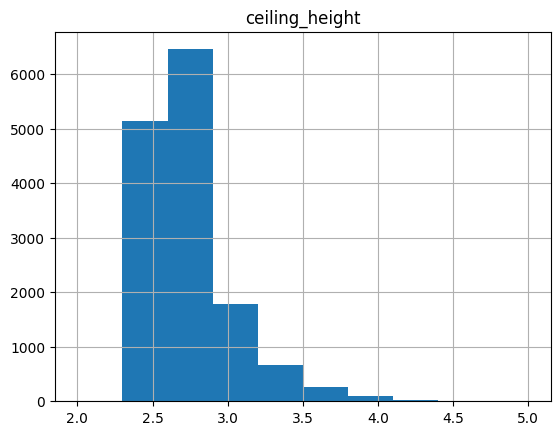

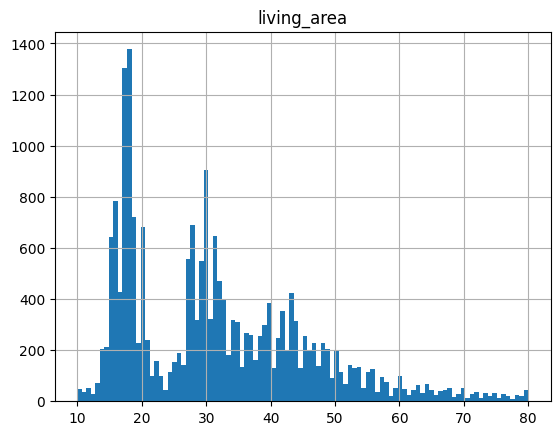

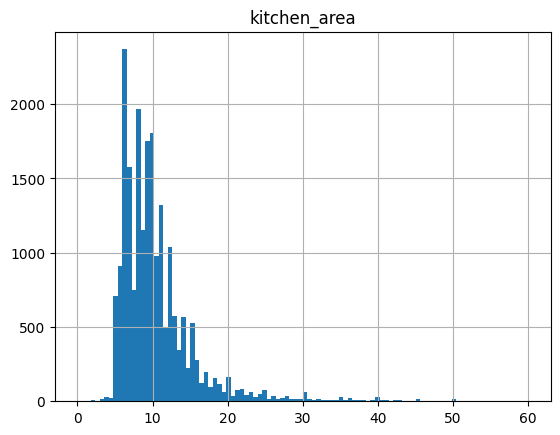

In [ ]:
data.hist('ceiling_height', bins=10, range=(2,5))
data.hist('living_area', bins = 100, range = (10, 80))
data.hist('kitchen_area', bins=100, range = (0,60))

Во всех трех переменных распределение неравномерное (в графике для потолков стремится к нормальному), поэтому для заполнения отсутствующих значений использую медианное значение по каждому из столбцов.

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())

В столбце **days_exposition** (сколько дней было размещено объявление) есть нулевые значения.

Возможно, объявление было опубликовано в тот же день, когда собирали данные, поэтому информации еще нет. Либо объявление еще не сняли, поэтому количество дней, когда объявление было в работе, не посчитано.

В любом случае, нулевые значения будет удобно заменить (их 13,4%, просто избавиться не получится).

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

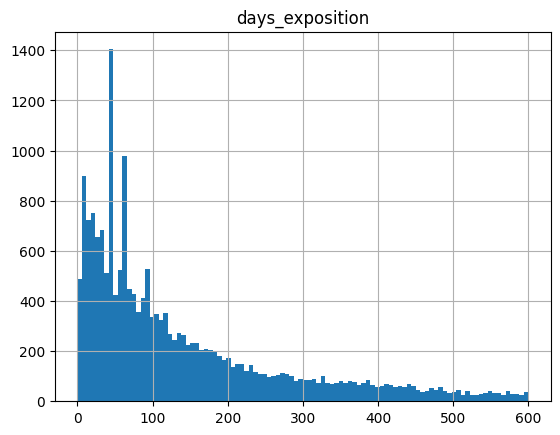

In [ ]:
#построить гистограмму, чтобы определить распределение и способ замены пропусков
data.hist('days_exposition', bins = 100, range = (0,600))

Распределение не нормальное, в данных есть выбросы. Поэтому использую медианное значение для заполнения пропусков.

In [ ]:
#заменить пропуски на медианное значение
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

Пропущенные значения в переменных **airport_nearest** (расстояние до ближайшего аэропорта в метрах) и **cityCenters_nearest** (расстояние до центра города в метрах) нельзя восстановить относительно переменной **locality_name** (название населенного пункта) и соответствующего среднего значения.

В исходной таблице населенных пунтов 364, а в сводной таблице получается всего 26. По 338 пунктам нет данных. В будущем их можно добавлять автоматически, взяв расстояние от населенного пункта до 0 километра Петербурга.

Предположу, что владельцы могут считать эту информацию очевидной, вычисляемой по адресу потенциальным покупателем, и не указывать ее.

Нет возможности восстановить данные и в остальных столбцах с пропусками, например, заполнить количество парков или водных зон рядом, а также расстояние до них.

Эти данные, в целом, не самые важные, не удивительно, что в них много пропусков.



---



В датасете много данных, не хотелось бы обрабатывать одинаковые значения. Проверю датасет на полные дубликаты.

In [ ]:
#проверить на дубликаты
print(data.duplicated().sum())

0


Дубликатов нет.

### Вывод:
  - Восполнила пропуски в данных, указывающих на высоту потолков, жилую площадь и площадь кухни, основываясь на медианных значениях.
  - Убрала незначительную часть данных, связанных с пропусками в населенном пункте и общем количестве этажей в доме.
  - Исправила информацию о наличии балконов: вместо пропусков вписали 0, предполагая, что балконов просто нет.
  - Вместо нулевого значения в столбце, отвечающем за время показа объявления, теперь медианное значение.

### Обратить внимание:
  - В данных много пропусков, которые не восполнить. Например, не получится определить, сколько рядом с жильем парков или прудов.
  - Расстояние до центра посчитать также не удалось. Для 338 населенных пунктов просто не указаны такие данные. Если учитывается расстояние до центра Санкт-Петербурга, тогда можно взять утвержденное число: расстояние от населенного пункта до нулевого километра города.
  - То же касается аэропортов.

## 2. Дополнение данных

В датасете нет важного параметра — стоимости жилья за квадратный метр. Посчитаю для каждой записи.

In [ ]:
#посчитать стоимость жилья за квадратный метр
data['square_price'] = data['last_price']/data['total_area']

#изменить тип данных с float на integer для last_price и square_price
data['last_price'] = data['last_price'].astype('int')
data['square_price'] = data['square_price'].astype('int')

Я уже приводила в порядок дату. Чтобы можно было делать выводы по годам, дням недели и месяцам, нужно поделить дату на отдельные блоки — дни, годы и месяцы соответственно, и внести их в новые столбцы.

In [ ]:
#получить столбец с днями
data['wday'] = data['first_day_exposition'].dt.weekday

#получить столбец с месяцами
data['month'] = data['first_day_exposition'].dt.month

#получить столбец с годами
data['year'] = data['first_day_exposition'].dt.year

Теперь **wday** отвечает за день недели, **month** за месяц, а **year** за год публикации объявления.


---



Этаж, на котором находится квартира, важен. Часто покупатели фильтруют выдачу, указывая "не первый" и "не последний". Цена квартиры также зависит от этого фактора. Поэтому определю, на каком этаже находится кваждая квартира.

In [ ]:
#функция для определения, какой этаж: первый, последний или другой
data['floor_type'] = data['floor']
for i in range (len(data)):
  if data['floor_type'][i] == 1:
    data['floor_type'][i] = 'первый'
  elif data['floor_type'][i] == data['floors_total'][i]:
    data['floor_type'][i] = 'последний'
  elif (data['floor_type'][i] != 1) and (data['floor_type'][i] != data['floors_total'][i]):
    data['floor_type'][i] = 'другой'

<ipython-input-44-e534d7006478>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_type'][i] = 'другой'


Размер комнат имеет значение. В квадратных метрах не всегда понятно, большая кухня или нет, достаточно ли просторная жилая зона или нет.

Определю соотношение жилой зоны (**living_area**) и кухни (**kitchen_area**) к общей площади квартиры (**total_area**).

In [ ]:
data['total_live_ratio'] = data['living_area']/data['total_area']
data['total_kitchen_ratio'] = data['kitchen_area']/data['total_area']

Теперь за соотношение жилой зоны к общей площади квартиры отвечает **total_live_ratio**, а за соотношение кухни к общей площади квартиры **total_kitchen_ratio**.


---



Итоговая таблица.

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,wday,month,year,floor_type,total_live_ratio,total_kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


### Вывод:
  - Получила новые данные, которые помогут в исследовании.
  - Рассчитала стоимость квадратного метра.
  - Добавила указание на год, месяц и день публикации объявления (новые столбцы).
  - Провела категориальное деление по этажам.
  - Рассчитала соотношение жилой и общей площади, а также кухонной и общей площади для каждого объявления.

Данные в рабочем виде, можно приступать к их анализу.

## 3. Анализ данных

### 3.1. Распределение данных
Задача - понять, какие параметры влияют на цену квартир, и научиться предсказывать **last_price** (цену).

Очевидное влияние оказывают данные **total_area** (площадь квартиры в метрах квадратных), **rooms** (число комнат), возможно, **ceiling_height** (высота потолков в метрах)

Проверю, как распределяются эти данные (построю гистограммы) — посмотрю на все возможные значения переменных с частотой появления.

Text(0, 0.5, 'Количество')

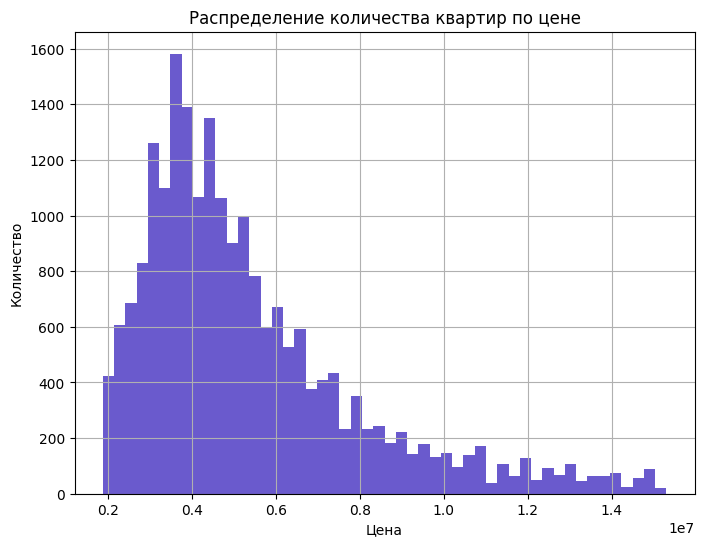

In [ ]:
#построить гистограмму цены
price = data['last_price'].plot(kind='hist', title='Распределение количества квартир по цене', range = (1870000, 15300000), bins=50, figsize = (8,6), grid = True, color='slateblue')
price.set_xlabel('Цена')
price.set_ylabel('Количество')

**Вывод:** наиболее высокие показатели в районе 3.5-4 миллионов (больше 1600 квартир). Значит, наиболее распространенная цена именно в этом диапазоне.

После 4 миллионов наблюдается плавное снижение — с ростом цены уменьшается количество квартир, продаваемых за эту стоимость.

Гистограмма не плавная, есть выбросы. Это значит, что есть дополнительные параметры, которые влияют на количество квартир, выставляемых по более высокой цене.

Text(0, 0.5, 'Количество')

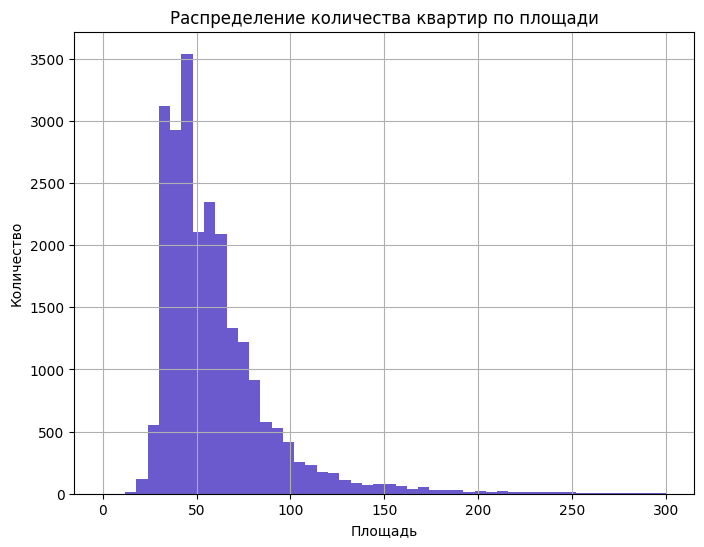

In [ ]:
#построить гистограмму площади
square = data['total_area'].plot(kind='hist', title='Распределение количества квартир по площади', range = (0, 300), bins=50, figsize = (8,6), grid = True, color='slateblue')
square.set_xlabel('Площадь')
square.set_ylabel('Количество')

**Вывод:** наиболее распространенная площадь квартир находится в районе 45 квадратных метров.

После отметки в 60 квадратных метров наблюдается плавное снижение количества квартир с большей площадью.

Text(0, 0.5, 'Количество')

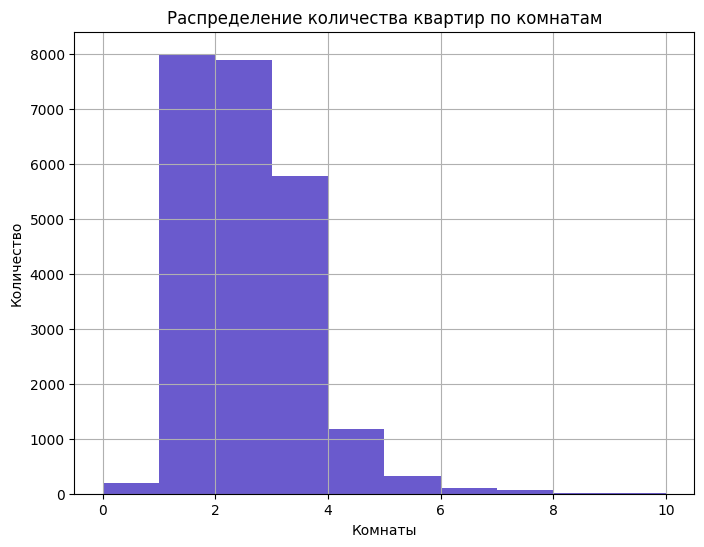

In [ ]:
#построить гистограмму количества комнат
room = data['rooms'].plot(kind='hist', title='Распределение количества квартир по комнатам', range = (0, 10), bins=10, figsize = (8,6), grid = True, color='slateblue')
room.set_xlabel('Комнаты')
room.set_ylabel('Количество')

**Вывод:** больше всего в продаже однокомнатных квартир (8000), а также двухкомнатых (чуть меньше 8000).

Есть отдельные объявления с большим количеством комнат, однако даже больше трех комнат в квартире — уже редкость.

Text(0, 0.5, 'Количество')

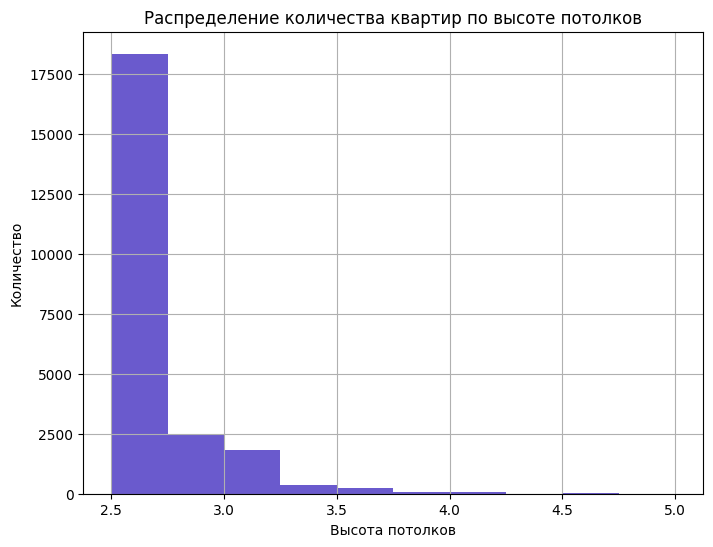

In [ ]:
#построить гистограмму высоты потолков
ceiling = data['ceiling_height'].plot(kind='hist', title='Распределение количества квартир по высоте потолков', range = (2.5,5), bins=10, figsize = (8,6), grid = True, color='slateblue')
ceiling.set_xlabel('Высота потолков')
ceiling.set_ylabel('Количество')

**Вывод:** больше всего квартир с потолками высотой в районе 2.5-2.6 метра. Стандартная высота потолков в российских квартирах — 2.4 метра. Небольшое отклонение возможно, потому что я заменяла отсутствующие значения медианными.

Квартир с высокими потолками — от 3 метров — значительно меньше (вероятно, это старый фонд, сталинки или более раняя постройка).

### 3.2. Распределение даты
Объявления были активны разное время. Нужно проверить, за какой промежуток времени сколько квартир продалось, построив гистограмму распределения по столбцу **days_exposition**.

Text(0, 0.5, 'Количество квартир')

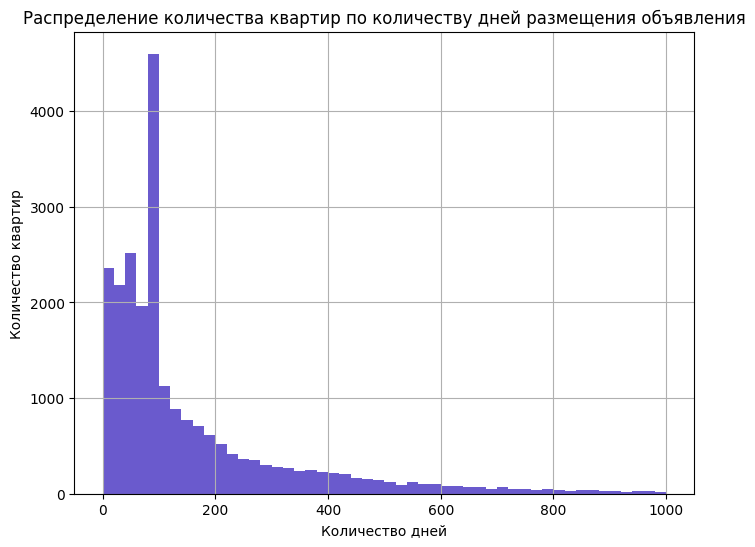

In [ ]:
#построить гистограмму, сколько дней было размещено объявление
exposition = data['days_exposition'].plot(kind='hist', title='Распределение количества квартир по количеству дней размещения объявления', bins=50, range = (0, 1000), figsize = (8,6), grid = True, color='slateblue')
exposition.set_xlabel('Количество дней')
exposition.set_ylabel('Количество квартир')

В диапазоне от 0 до 150 самая высокая активность. Посмотрю ближе, чтобы сделать более точные выводы по графику.

Text(0, 0.5, 'Количество квартир')

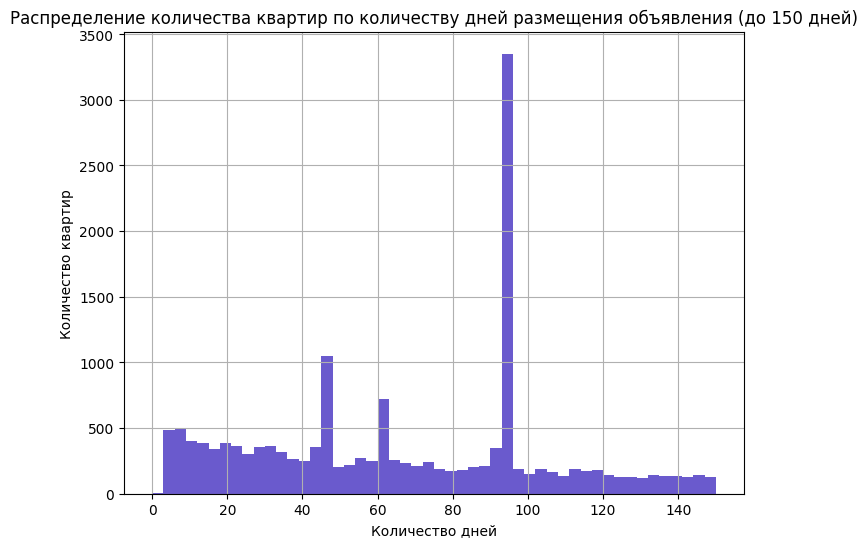

In [ ]:
#посмотрим гистограмму ближе — в диапазоне от 0 до 100
exposition150 = data['days_exposition'].plot(kind='hist', title='Распределение количества квартир по количеству дней размещения объявления (до 150 дней)', bins=50, range = (0, 150), figsize = (8,6), grid = True, color='slateblue')
exposition150.set_xlabel('Количество дней')
exposition150.set_ylabel('Количество квартир')

На первом графике длинный "хвост" справа от пика. Нужно определить, какое количество дней будет считаться слишком долгим для продажи квартиры. Заодно посчитаю, сколько дней можно назвать слишком коротким сроком продажи.

Для этого нужно определить первый и третий квартили (Q1 и Q3). Полученное количество дней будет отсечкой.

Можно посмотреть распределение количества дней продажи квартир между этими показателями, оно должно приближаться к нормальному.

In [ ]:
#посчитать Q1 (первый квартиль) и Q3 (третий квартиль)
print('Q1 (первый квартиль):', data['days_exposition'].quantile(0.25))
print('Q3 (третий квартиль):', data['days_exposition'].quantile(0.75))

Q1 (первый квартиль): 45.00000000000001
Q3 (третий квартиль): 198.0


Text(0, 0.5, 'Количество квартир')

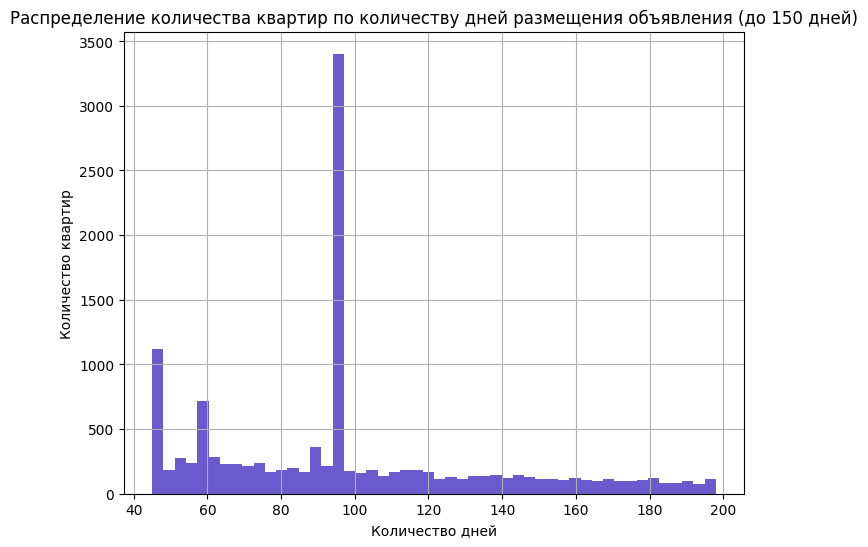

In [ ]:
#посмотрим гистограмму ближе — в диапазоне от Q1 до Q3
exposition_quantile = data['days_exposition'].plot(kind='hist', title='Распределение количества квартир по количеству дней размещения объявления (до 150 дней)', bins=50, range = (45, 198), figsize = (8,6), grid = True, color='slateblue')
exposition_quantile.set_xlabel('Количество дней')
exposition_quantile.set_ylabel('Количество квартир')

Распределение стремится к нормальному, но график не плавный.

---

Теперь посчитаю среднее и медианное количество дней активности объявлений, чтобы проверить данные.

In [ ]:
#найти среднее количество дней активности объявления
print('Среднее количество дней активности объявления:', data['days_exposition'].mean())

#найти медианное количество дней активности объявления
print('Медианное количество дней активности объявления: ', data['days_exposition'].median())

Среднее количество дней активности объявления: 169.2036919159771
Медианное количество дней активности объявления:  95.0


**Вывод:** больше всего квартир было продано примерно за 95 дней (больше 3 тысяч объявлений). Это медианное значение. В среднем же квартиры продаются за 169 дней.

При этом, судя по графику, больше 100 дней объявления редко остаются активными, сразу после отметки 100 наблюдается спад количества выставляемых квартир.

В то же время есть небольшие выбросы в районе 45 и 60 дней. Эти отметки входят в число "нормальных" продаж.

До "аномальных" 45 дней и 198 дней выбросов нет. Это значит, что количество слишком быстрых и слишом долгих продаж на данные не влияет.

### 3.3. Зависимость данных
Я посмотрела достаточно зависимостей количества проданных квартир от других параметров, но как от этих параметров зависит цена — пока непонятно.

Нужно проверить.

Коэффициент корреляции Пирсона (цена-площадь): 0.6536213939252806


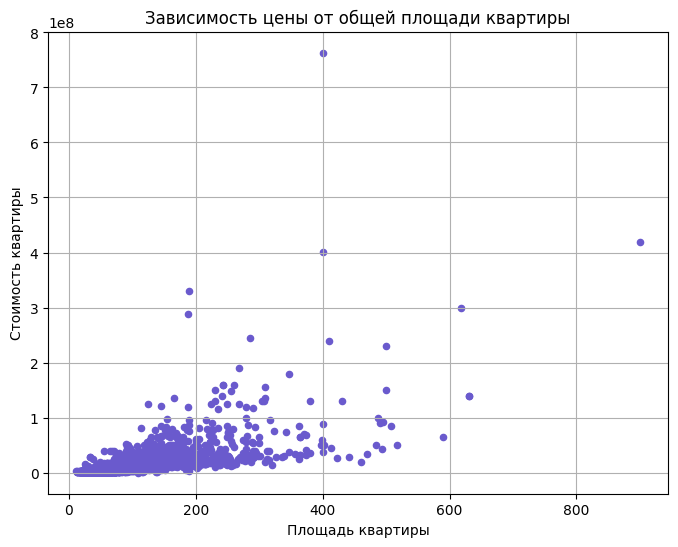

In [ ]:
#проверить зависимость цены от общей площади квартиры
corr_square = data.plot(x = 'total_area', y = 'last_price', kind='scatter', title='Зависимость цены от общей площади квартиры', grid = True,  figsize=(8,6), color='slateblue')
corr_square.set_xlabel('Площадь квартиры')
corr_square.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-площадь):', data['last_price'].corr(data['total_area']))

Чем меньше площадь квартиры, тем ниже цена. Это логично. Есть выбросы, но их мало, и они могут объясняться влиянием других факторов.

Text(0, 0.5, 'Стоимость квартиры')

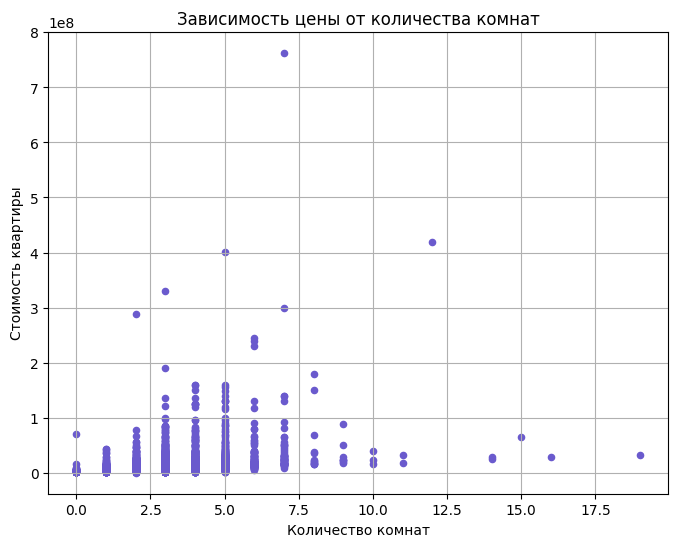

In [ ]:
#проверить зависимость цены от количества комнат в квартире
corr_room = data.plot(x = 'rooms', y = 'last_price', kind='scatter', title='Зависимость цены от количества комнат', grid = True,  figsize=(8,6), color='slateblue')
corr_room.set_xlabel('Количество комнат')
corr_room.set_ylabel('Стоимость квартиры')

Интересные данные. Большое количество комнат почему-то снижает стоимость квартиры. Может быть, это бывшее общежитие или коммуналка, поэтому цена ниже, чем я могла бы предположить.

Посмотрю поближе промежуток от 0 до 7, где сосредоточено наибольшее количество данных.

Коэффициент корреляции Пирсона (цена-комнаты): 0.3631905485065748


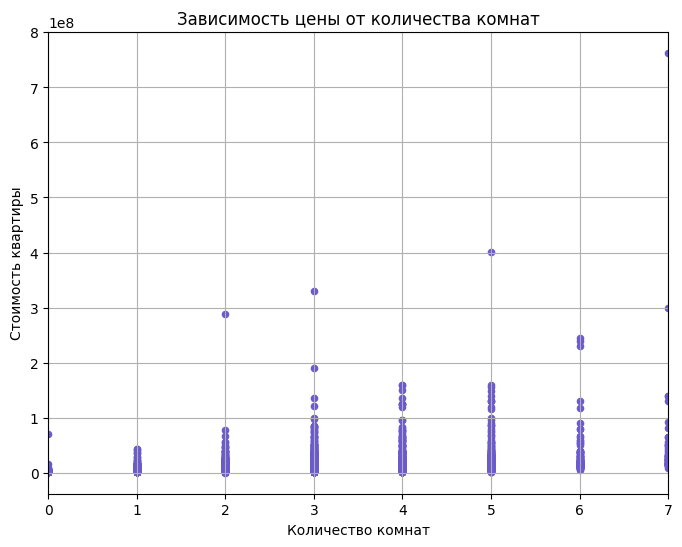

In [ ]:
#проверить зависимость цены от количества комнат в квартире (на промежутке от 0 до 7)
corr_room = data.plot(x = 'rooms', y = 'last_price', kind='scatter', title='Зависимость цены от количества комнат', xlim = (0,7), grid = True,  figsize=(8,6), color='slateblue')
corr_room.set_xlabel('Количество комнат')
corr_room.set_ylabel('Стоимость квартиры')

print('Коэффициент корреляции Пирсона (цена-комнаты):', data['last_price'].corr(data['rooms']))

Судя по графику, цена квартиры от количества комнат мало зависит. Вижу примеры 3-комнатных квартир как с очень низкой ценой (приближается к нулевой отметке), так и с очень высокой.

Коэффициент корреляции подтверждает этот вывод: он стремится к нулю. Взаимосвязь двух показателей слабая.

И все же возможность продать дороже квартиру, в которой больше 2 комнат, очевидна.



---


Посмотрю, влияет ли местоположение квартиры на ее стоимость.

Напомню, что в данных есть 23% пропусков, которые я оставила незаполненными из-за невозможности понять, что считается центром для отдельных населенных пунктов — их центр или расстояние до центра Санкт-Петербурга.

Однако и по 70% данных можно посмотреть складывающуюся картину.

Text(0, 0.5, 'Стоимость квартиры')

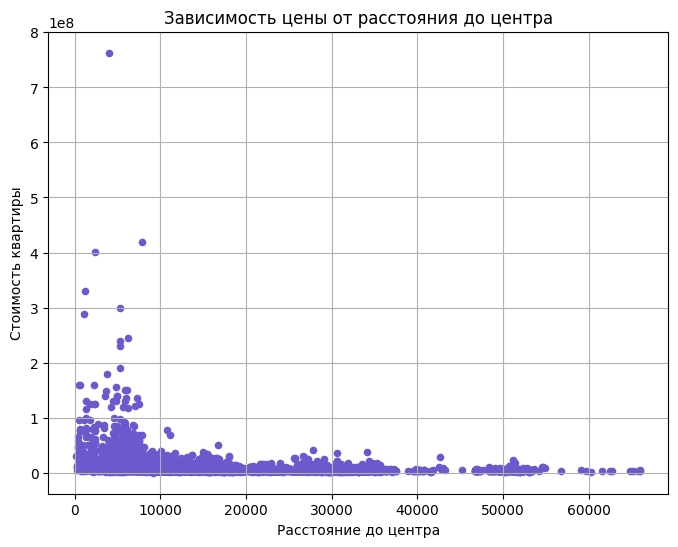

In [ ]:
#проверить зависимость цены от удаленности от центра
corr_center = data.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter', title='Зависимость цены от расстояния до центра', grid = True,  figsize=(8,6), color='slateblue')
corr_center.set_xlabel('Расстояние до центра')
corr_center.set_ylabel('Стоимость квартиры')

Посмотрю данные поближе. Новый график покажет стоимость квартир, расположенных близко к центру.

Коэффициент корреляции Пирсона (цена-расстояние): -0.2063531426431107


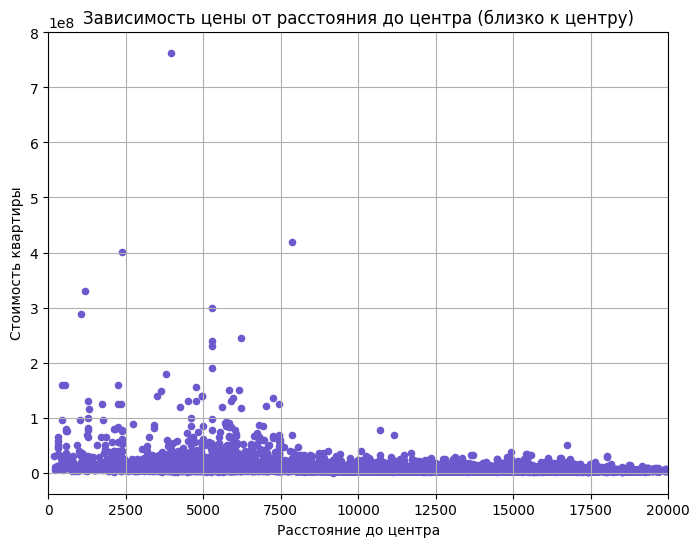

In [ ]:
#проверить зависимость цены от удаленности от центра (для близких квартир)
corr_center_nearest = data.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter', title='Зависимость цены от расстояния до центра (близко к центру)', xlim = (0, 20000), grid = True,  figsize=(8,6), color='slateblue')
corr_center_nearest.set_xlabel('Расстояние до центра')
corr_center_nearest.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-расстояние):', data['last_price'].corr(data['cityCenters_nearest']))

Коэффициент корреляци Пирсона отрицательный, это значит, что наблюдается обратная зависимость — чем дальше от центра, тем ниже цена.

Действительно, на графике видно, что ближайшие к началу координат точки чаще стремятся выше по оси Y, чем дальние — значит, стоимость этих квартир выше.

При этом явная зависимость цены от расположения все же не наблюдается. Если убрать выбросы, получу равное распределение на всем графике.



---

Проверю, влияет ли на цену этаж, на котором расположена квартира.

Text(0, 0.5, 'Стоимость квартиры')

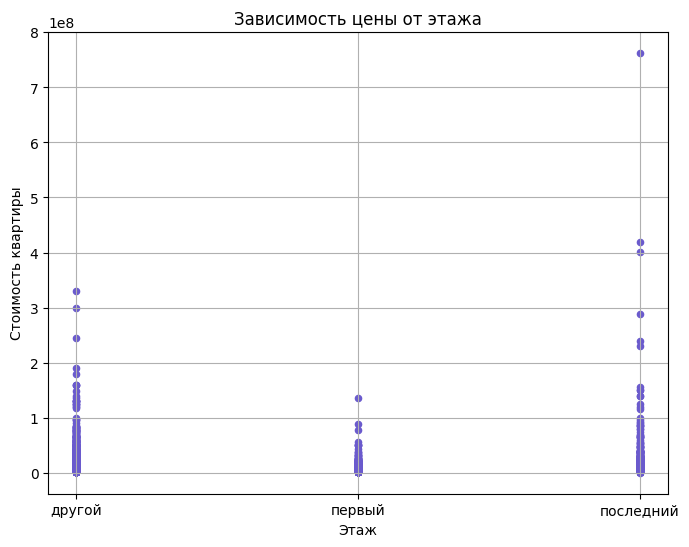

In [ ]:
#проверить зависимость цены от этажа
corr_floor = data.plot(x = 'floor_type', y = 'last_price', kind='scatter', title='Зависимость цены от этажа', grid = True,  figsize=(8,6), color='slateblue')
corr_floor.set_xlabel('Этаж')
corr_floor.set_ylabel('Стоимость квартиры')

Если этаж не первый, вероятность продать квартиру дороже увеличивается. У последнего этажа даже больше шансов, чем у срединых. При этом в начале графика все равно большое скопление точек — значит, зависимость цены от этажа невысокая.



---

Посмотрю, зависит ли цена квартиры от времени размещения объявления — года, когда продавали квартиру, месяца и даже дня недели. Вдруг эти неочевидные факторы значимы.

Коэффициент корреляции Пирсона (цена-год): -0.042864152713611034


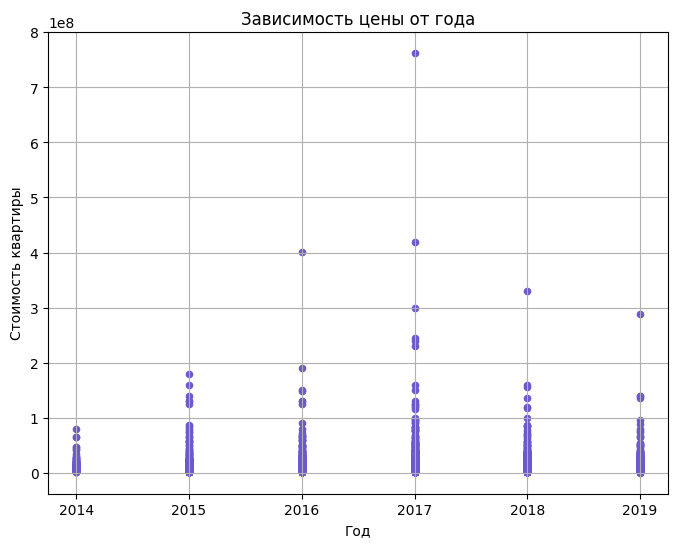

In [ ]:
#проверить зависимость цены от года продажи
corr_year = data.plot(x = 'year', y = 'last_price', kind='scatter', title='Зависимость цены от года', grid = True,  figsize=(8,6), color='slateblue')
corr_year.set_xlabel('Год')
corr_year.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-год):', data['last_price'].corr(data['year']))

Начиная с 2014 года, цена квартир росла, однако в 2018 году пошла на спад.

Коэффициент корреляции при этом отрицательный, чем ближе к нашему врмени, тем меньше цена.

Коэффициент корреляции Пирсона (цена-месяц): 0.0027259571647347603


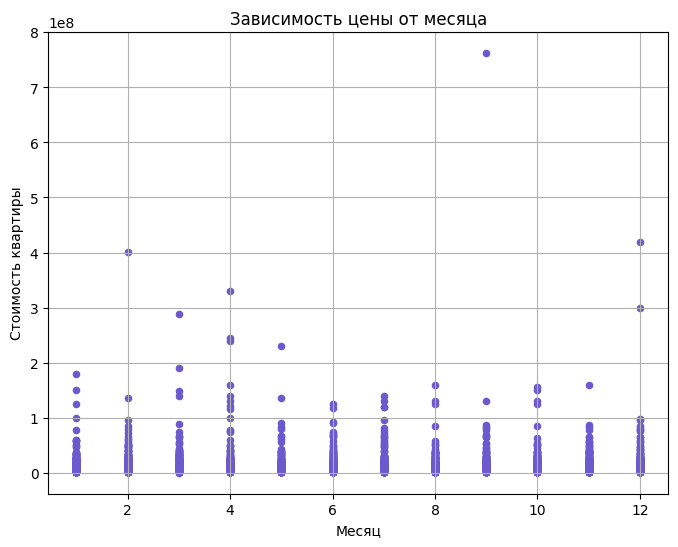

In [ ]:
#проверить зависимость цены от месяца продажи
corr_month = data.plot(x = 'month', y = 'last_price', kind='scatter', title='Зависимость цены от месяца', grid = True,  figsize=(8,6), color='slateblue')
corr_month.set_xlabel('Месяц')
corr_month.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-месяц):', data['last_price'].corr(data['month']))

Зависимость от месяца, в который выставили объявление, почти нулевая. Данные равномерные, есть отдельные выбросы, но они не складываются в цельную картину.

Коэффициент корреляции Пирсона (цена-месяц): 0.0013569211122710775


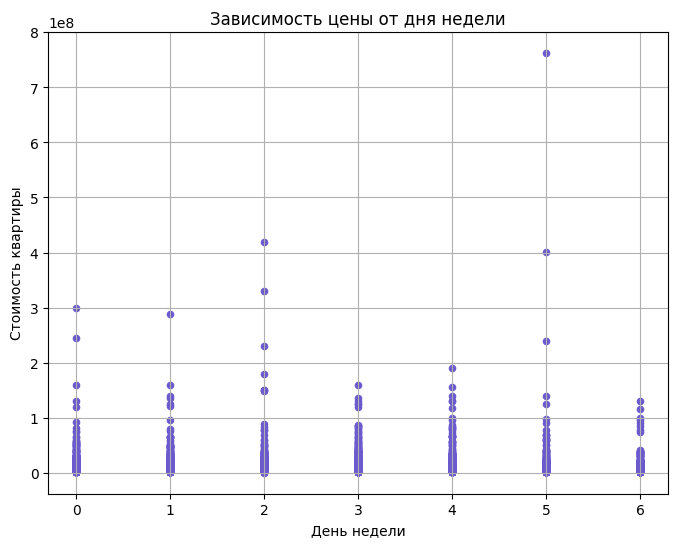

In [ ]:
#проверить зависимость цены от месяца продажи
corr_wday = data.plot(x = 'wday', y = 'last_price', kind='scatter', title='Зависимость цены от дня недели', grid = True,  figsize=(8,6), color='slateblue')
corr_wday.set_xlabel('День недели')
corr_wday.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-месяц):', data['last_price'].corr(data['wday']))

И снова очень низкая зависимость. Не важно, в какой день выставлять объявление.

**Вывод:** 
  - очевидна зависимость цены от площади квартиры: чем больше квартира, тем она дороже;
  - неочевидна, но существует зависимость цены от количества комнат: жилье, где больше 1 комнаты, дороже, однако квартиру с 5 комнатами и больше уже не так легко дорого продать;
  - неочевидна, но существует зависимость цены от расстояния до центра: чем ближе квартира к центру (предполагается, к центру Петербурга), тем больше ее стоимость;
  - неочевидна, но существует зависимость цены от этажа: квартиры не на первом этаже стоят больше;
  - месяц и день недели не влияют на стоимость квартиры;
  - существует зависимость цены от года продажи, однако она не линейная.

### 3.4. Топ-10 населеных пунктов
Проверю, в каких населенных пунктах продалось больше всего квартир, и посмотрю на их статистические показатели.

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,wday,month,year,floor_type,total_live_ratio,total_kitchen_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,2.0,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,0.0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,2.0,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,3.0,234.0,424.0,408176,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,1.0,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000


In [ ]:
#выделить 10 населенных пунктов, в которых продалось больше всего квартир
top_locality = data['locality_name'].value_counts().head(10)
locality_price = data.pivot_table(index='locality_name', values='square_price', aggfunc='mean')
top10_price = locality_price.merge(top_locality, how='right', left_index=True, right_index=True)
top10_price.rename(columns={'locality_name':'amount_sold'}, inplace=True)
top10_price = top10_price.sort_values(by=['square_price'], ascending=False)

In [ ]:
#посмотреть получившийся список
top10_price.head(10)

,square_price,amount_sold
Санкт-Петербург,114868.433902,15651
Пушкин,103125.373984,369
деревня Кудрово,92473.086957,299
посёлок Парголово,90175.489297,327
посёлок Мурино,85672.803846,520
посёлок Шушары,78550.883827,439
Колпино,75424.150888,338
Гатчина,68745.693811,307
Всеволожск,68654.007538,398
Выборг,58141.489451,237


In [ ]:
print('Самое дорогое жилье: \n', top10_price.loc[top10_price['square_price']==top10_price['square_price'].max()])
print('\nСамое дешевое жилье: \n', top10_price.loc[top10_price['square_price']==top10_price['square_price'].min()])

Самое дорогое жилье: 
                   square_price  amount_sold
Санкт-Петербург  114868.433902        15651

Самое дешевое жилье: 
         square_price  amount_sold
Выборг  58141.489451          237


**Вывод:** самое дорогое жилье, ожидаемо, в Санкт-Петербурге. Самое дешевое в Выборге (если мы рассматриваем 10 первых населенных пунктов по количеству проданных квартир).

В Санкт-Петербурге продали 15 651 квартиру, средняя цена за квадратный метр — 114 868 рублей.

В Выборге продали 237 квартир, средняя цена за квадратный метр — 58 141 рубль.

Разница существенная.

### 3.5. Данные по центру Петербурга
В Санкт-Петербурге цена на жилье тоже разная. Как я ранее выяснила, чем ближе к центру, тем дороже. Пора узнать, есть ли такая корреляция в Петербурге и где там центр.

In [ ]:
#создать таблицу с данными для Петербурга
flats_petersburg = data[data['locality_name'] == 'Санкт-Петербург']

In [ ]:
#создать столбец с информацией о близости к центру в километрах (округлить данные)
flats_petersburg['cityCenter_km'] = round((flats_petersburg['cityCenters_nearest']/1000), 0)

<ipython-input-70-477f089e057c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flats_petersburg['cityCenter_km'] = round((flats_petersburg['cityCenters_nearest']/1000), 0)


In [ ]:
#создать сводную таблицу для графика зависимости
mean_price_km = flats_petersburg.pivot_table(index='cityCenter_km', values='square_price', aggfunc='mean')
mean_price_km.reset_index(inplace=True)

Text(0, 0.5, 'Цена за квадратный метр')

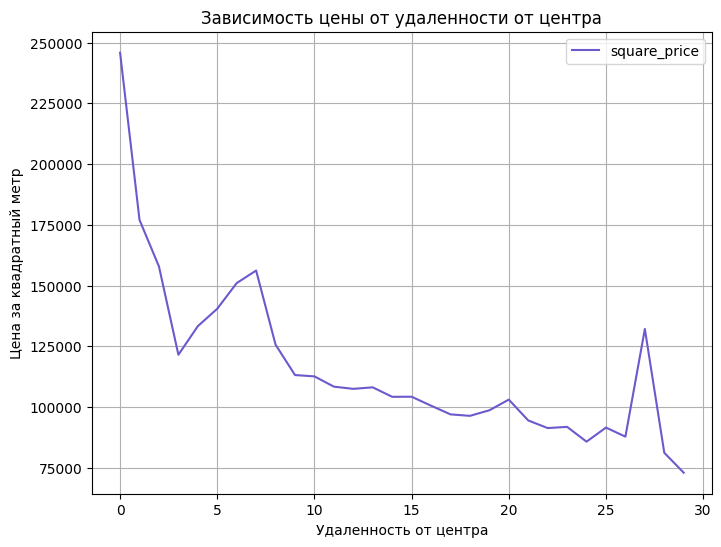

In [ ]:
#график зависимости цены от удалености от центр (для Петербурга)
price_center = mean_price_km.plot(x='cityCenter_km', y = 'square_price', kind='line', title='Зависимость цены от удаленности от центра', grid = True,  figsize=(8,6), color='slateblue')
price_center.set_xlabel('Удаленность от центра')
price_center.set_ylabel('Цена за квадратный метр')

In [ ]:
#создать таблицу для квартир в центре Петербурга
center_data = flats_petersburg[flats_petersburg['cityCenter_km']<=7]

**Вывод:** изменения в данных по Петербургу приходятся примерно на 3 километра удаленности от центра. Наблюдаю неожиданный взлет в данных, затем снова падение, и взлет в районе 27 километров. Возможно, там элитный район.

В любом случае, радиусом центра буду считать 3 километра. Применила соответствующий фильтр к данным, теперь информация хранится в таблице **center_data**.

### 3.6. Распределение и зависимость данных для центра Петербурга
Проведу ту же работу, что делала для данных по всему Петербургу и прилегающей территории. 

Посмотрю распределение данных по стоимости жилья, высоте потолков, площади, количеству комнат.

Затем проверю, какие факторы влияют на стоимость квартир в Санкт-Петербурге.

Text(0, 0.5, 'Количество')

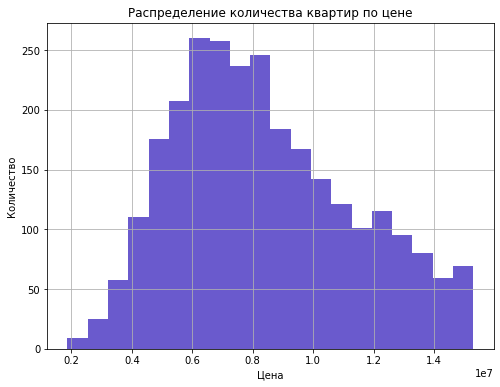

In [ ]:
#построить гистограмму цены
center_price = center_data['last_price'].plot(kind='hist', title='Распределение количества квартир по цене', bins=20, range = (1870000, 15300000), figsize = (8,6), grid = True, color='slateblue')
center_price.set_xlabel('Цена')
center_price.set_ylabel('Количество')

Распределение стремится к нормальному. Средних по цене квартир было продано больше всего.

При этом средняя цена в центре - 8 миллионов.

Text(0, 0.5, 'Количество')

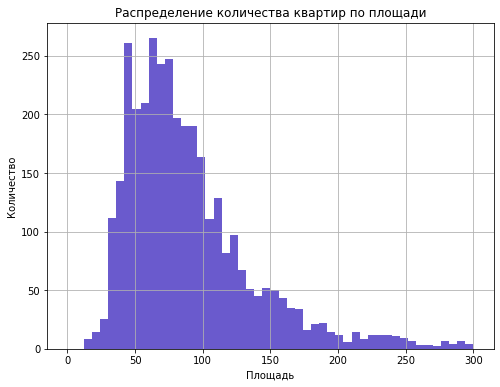

In [ ]:
#построить гистограмму площади
center_area = center_data['total_area'].plot(kind='hist', title='Распределение количества квартир по площади', bins=50, range = (0,300), figsize = (8,6), grid = True, color='slateblue')
center_area.set_xlabel('Площадь')
center_area.set_ylabel('Количество')

Распределение стремится к нормальному. Чем больше площадь квартир, тем больше их продается. Однако после медианного значения начинается плавное снижение количества объявлений — это закономерно, т.к. квартиры большой площади тоже встречаются реже квартир средней площади.

Больше всего продается квартир площадь от 55 до 75 квадратных метров.

Text(0, 0.5, 'Количество квартир')

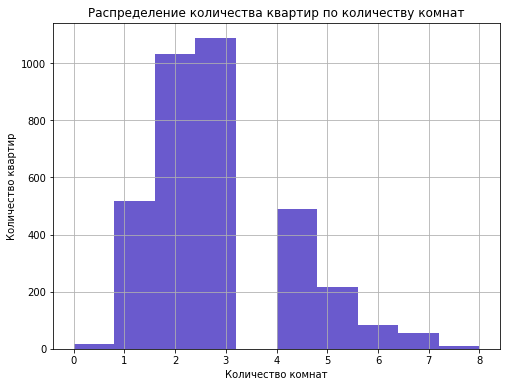

In [ ]:
#построить гистограмму количества комнат
center_room = center_data['rooms'].plot(kind='hist', title='Распределение количества квартир по количеству комнат', bins=10, range=(0,8), figsize = (8,6), grid = True, color='slateblue')
center_room.set_xlabel('Количество комнат')
center_room.set_ylabel('Количество квартир')

Распределение стремится к нормальному. Больше всего продано 2 и 3 комнатных квартир, чем больше комнат, тем меньше жилья продается. Это закономерно, жилья с большим количеством комнат в принципе меньше.

Text(0, 0.5, 'Количество')

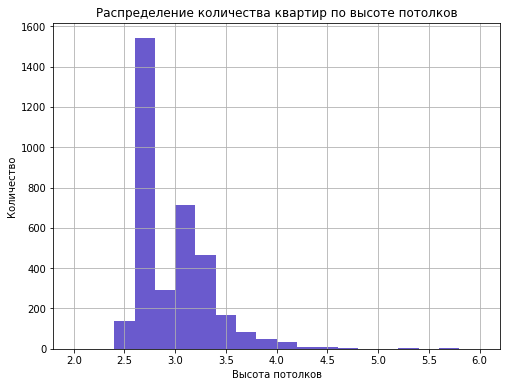

In [ ]:
#построить гистограмму высоты потолков
center_ceiling = center_data['ceiling_height'].plot(kind='hist', title='Распределение количества квартир по высоте потолков', bins=20, range = (2,6), figsize = (8,6), grid = True, color='slateblue')
center_ceiling.set_xlabel('Высота потолков')
center_ceiling.set_ylabel('Количество')

Больше всего квартир с потолками около 2.5 метра. Это нормальная высота потолков для квартир в России.

В центре Петербурга много жилья в старом фонде, а там потолки высокие. Поэтому в районе 3-3.5 метра наблюдается рост числа квартир с таким показателем высоты потолков.

Text(0, 0.5, 'Количество квартир')

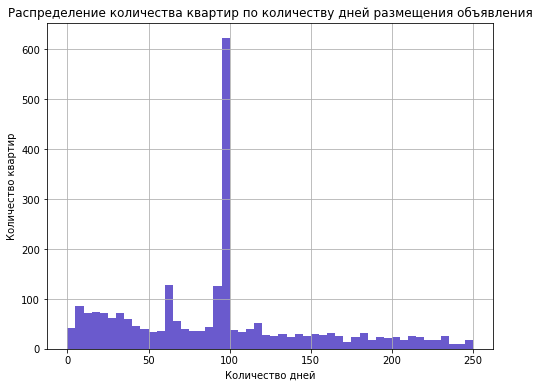

In [ ]:
#построить гистограмму времени продажи квартиры
exposition_center_exposition_total = center_data['days_exposition'].plot(kind='hist', title='Распределение количества квартир по количеству дней размещения объявления', bins=50, range=(0,250), figsize = (8,6), grid = True, color='slateblue')
exposition_center_exposition_total.set_xlabel('Количество дней')
exposition_center_exposition_total.set_ylabel('Количество квартир')

Значительно выбивается показатель в 95 дней. Чаще всего именно за такой период продается квартира в центре Петербурга.

Коэффициент корреляции Пирсона (цена-площадь): 0.6136073192218386


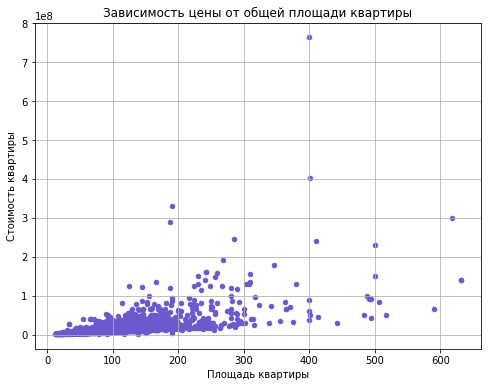

In [ ]:
#проверить зависимость цены от общей площади квартиры
corr_center_square = center_data.plot(x = 'total_area', y = 'last_price', kind='scatter', title='Зависимость цены от общей площади квартиры', grid = True,  figsize=(8,6), color='slateblue')
corr_center_square.set_xlabel('Площадь квартиры')
corr_center_square.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-площадь):', center_data['last_price'].corr(center_data['total_area']))

Чем меньше площадь квартиры, тем ниже ее стоимость. Выбросов почти нет, значит, аномально дорогие квартиры встречаются нечасто, данные хорошие.

Коэффициент корреляции Пирсона (цена-комната): 0.3148077030213493


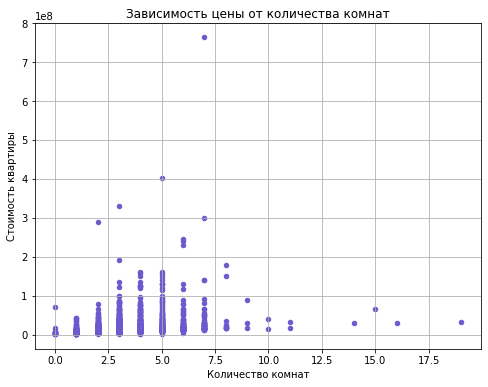

In [ ]:
#проверить зависимость цены от общей площади квартиры
corr_center_room = center_data.plot(x = 'rooms', y = 'last_price', kind='scatter', title='Зависимость цены от количества комнат', grid = True,  figsize=(8,6), color='slateblue')
corr_center_room.set_xlabel('Количество комнат')
corr_center_room.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-комната):', center_data['last_price'].corr(center_data['rooms']))

В центре Петербурга дороже стоят 4 и 5-комнатные квартиры. 3 и 2 комнаты дешевле, еще дешевле 1-комнатные.

Коэффициент корреляции Пирсона (цена-расположение): -0.0423181685007466


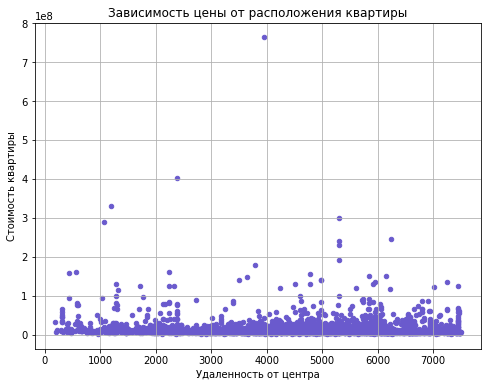

In [ ]:
#проверить зависимость цены от удаленности от центра
corr_center_distance = center_data.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter', title='Зависимость цены от расположения квартиры', grid = True,  figsize=(8,6), color='slateblue')
corr_center_distance.set_xlabel('Удаленность от центра')
corr_center_distance.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-расположение):', center_data['last_price'].corr(center_data['cityCenters_nearest']))

Чем больше радиус, в котором находятся квартиры, тем чаще их покупают за более низкую цену. Чем ближе к центру Питера, тем меньше дешевых квартир и квартир в принципе.

Распределение достаточно равномерное, есть редкие выбросы, чем дальше от центра, тем их меньше.

Text(0, 0.5, 'Стоимость квартиры')

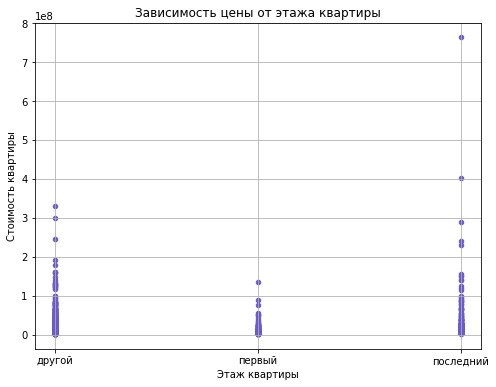

In [ ]:
#проверить зависимость цены от этажа квартиры
corr_center_floor = center_data.plot(x = 'floor_type', y = 'last_price', kind='scatter', title='Зависимость цены от этажа квартиры', grid = True,  figsize=(8,6), color='slateblue')
corr_center_floor.set_xlabel('Этаж квартиры')
corr_center_floor.set_ylabel('Стоимость квартиры')

Квартиры на первом этаже стоят меньше, чем на последнем или любом другом.

Квартиры на последнем этаже стоят меньше, чем на любом другом, кроме первого.

Коэффициент корреляции Пирсона (цена-год): -0.04671648167718656


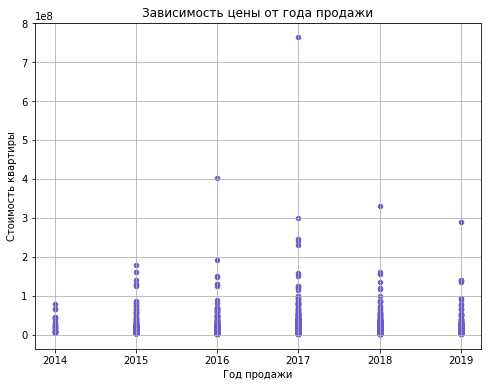

In [ ]:
#проверить зависимость цены от года продажи
corr_center_year = center_data.plot(x = 'year', y = 'last_price', kind='scatter', title='Зависимость цены от года продажи', grid = True,  figsize=(8,6), color='slateblue')
corr_center_year.set_xlabel('Год продажи')
corr_center_year.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-год):', center_data['last_price'].corr(center_data['year']))

Зависимость цены от года продажи не наблюдается.

Если ориентироваться на плотность точек, скорее, можно сделать вывод о поведении рынка в целом — насколько хорошо продавались квартиры.

Цена при этом остается в одном диапазоне за редкими исключениями.

Коэффициент корреляции Пирсона (цена-месяц): -0.01322379934458733


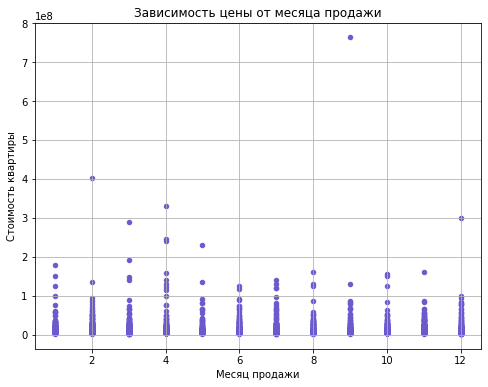

In [ ]:
#проверить зависимость цены от месяца продажи
corr_center_month = center_data.plot(x = 'month', y = 'last_price', kind='scatter', title='Зависимость цены от месяца продажи', grid = True,  figsize=(8,6), color='slateblue')
corr_center_month.set_xlabel('Месяц продажи')
corr_center_month.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-месяц):', center_data['last_price'].corr(center_data['month']))

Зависимость цены квартиры от месяца, в который публиковали объявление, не наблюдается.

Коэффициент корреляции Пирсона (цена-день недели): 0.028212954806738102


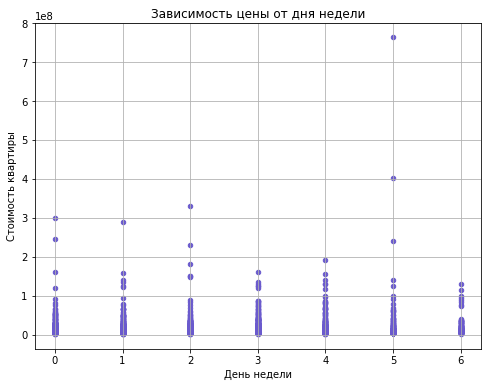

In [ ]:
#проверить зависимость цены от дня недели
corr_center_wday = center_data.plot(x = 'wday', y = 'last_price', kind='scatter', title='Зависимость цены от дня недели', grid = True,  figsize=(8,6), color='slateblue')
corr_center_wday.set_xlabel('День недели')
corr_center_wday.set_ylabel('Стоимость квартиры')
print('Коэффициент корреляции Пирсона (цена-день недели):', center_data['last_price'].corr(center_data['wday']))

Очевидной зависимости от дня недели, в который публиковалось объявление, и цены квартиры нет.

Text(0, 0.5, 'Стоимость квартиры')

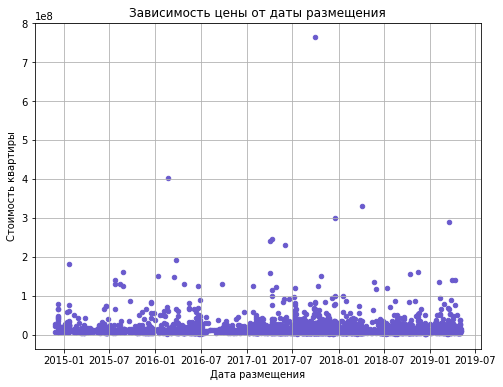

In [ ]:
#проверить зависимость цены от даты публикации
corr_center_exposition = center_data.plot(x = 'first_day_exposition', y = 'last_price', kind='scatter', title='Зависимость цены от даты размещения', grid = True,  figsize=(8,6), color='slateblue')
corr_center_exposition.set_xlabel('Дата размещения')
corr_center_exposition.set_ylabel('Стоимость квартиры')

Зависимости от даты размещения тоже нет, наблюдается та же картина, что и в графике зависимости от года размещения.

**Вывод:**
  - квартиры большей площади продаются реже;
  - квартиры с 2 и 3 комнатами покупали больше;
  - квартиры площадью от 60 до 100 квадратных метров продаются чаще;
  - квартир со стандартными потолками (высота около 2.6 метра) продано больше, чем квартир с потолками от 3 метров;

  - чем больше площадь квартиры, тем больше ее цена;
  - квартиры с большим количеством комнат продавались за более высокую цену (но не более 5 комнат);
  - квартиры на последнем этаже иногда стоят больше, чем на 1 этаже, но на любом другом этаже квартиру можно продать дороже;
  - чем ближе к центру, тем меньше квартир с маленькой ценой, на окраине центра таких квартир больше, при этом на небольшой удаленности от центра квартир по высокой стоимости больше;
  - дата, в которую публиковалось объявление, на стоимость не влияет.

### Вывод:
Осталось сравнить данные по центру Петербурга с данными по всему городу и прилегающей территории.

**По всему Санкт-Петербургу:**
  - квартиры с большей площадью стоят дороже;
  - жилья с 2-3 комнатами продается больше, такие квартиры и стоят дороже (но не больше 5 комнат);
  - чем ближе квартира к центру, тем выше ее стоимость и тем меньше квартир по низкой цене;
  - квартиры на 1 этаже дешевле, чем на любом другом.

**Не в центре Санкт-Петербурга:**
  - стоимость жилья меняется в зависимости от года продажи.

**В центре Санкт-Петербурга:**
  - квартиры стоят одинаково каждый год.

## 4. Общий вывод

### 4.1. Количество закрытых объявлений:

  - В центре Петербурга квартиры дороже, но самого жилья меньше. В центре больше всего квартир продается за 8 миллионов (70 объявлений), а в районах — за 3.5-4 миллиона (1600 объявлений).

  - В центре Питера больше объявлений с квартирами большой площади (55-75 квадратных метров), а в районах самый высокий показатель у квартир площадью 45 квадратных метров.

  - В центре Петербурга продается много 2 и 3-комнатных квартир, тогда как в районах больше закрытых объявлений о продаже 1 и 2-комнатных квартир. Больше 3 комнат — редкость.

  - И в центре, и в районах преобладают квартиры с высотой потолков, близкой к стандартной (2.4 метра). Однако в центре гораздо больше квартир с высотой потолков от 3 метров — это объясняется преобладанием старого фонда, в квартирах которого действительно высокие потолки.

  - В Санкт-Петербурге больше всего квартир продается на 95 день активности объявления. Пики в 45 и 60 дней для районов объясняются особенностями работы сервиса Яндекс.Недвижимость. В центре таких пиков нет.

### 4.2. Параметры, влияющие на цену недвижимости:

  - Цена сильно зависит от площади квартиры. Чем квартира меньше, тем ниже ее стоимость. Отдельные объявления выбиваются из общего графика, но эти выбросы объяснимы влиянием других факторов, например, удаленностью от центра или этажом, на котором расположено жилье.

  - Чем больше комнат в квартире, тем выше ее цена. Стоимость 3 и 4-комнатных квартир выше, чем 2 и 1-комнатных. При этом количество комнат больше 5, наоборот, снижает стоимость жилья. Возможно, дело в статусе недвижимости — бывшее общежитие или коммуналка действительно могут стоить дешевле. Однако зависимость цены от количества комнат гораздо ниже, чем зависимость цены от площади.

  - Чем дальше от центра, тем ниже цена. Я определила центр радиусом в 3 километра, чем ближе к нулевой отметке, тем меньше дешевых квартир и проданных квартир в принципе. Соответственно, на окраинах жилье продается чаще.
    
    Отмечу, что самое дорогое жилье в Санкт-Петербурге, а самое дешевое — в Выборге (если рассматривать первые 10 населенных пунктов по количеству проданных квартир).

  - Стоимость жилья на первом этаже меньше. В районах разницы между последним этажом и серединными почти нет. В центре Петербурга последний этаж все же предпочитают меньше. Предположу, что это связано с большим количеством старого фонда и проблемами с кровлей в этих домах.

  - Линейной зависимости цены от времени продажи квартиры нет. Однако отмечу, что в середине периода проданных по высокой цене квартир было больше. В общем цена оставалась примерно одинаковой, по графику можно увидеть, что количество проданных через Яндекс.Недвижимость квартир с годами росло. Возможно, этим объясняются невысокие показатели ранних лет. Зависимость от месяца и дня недели, в которые выставляли объявление, также не наблюдается.



---



*инструкция от Яндекса к заданию

**Предобработка данных**
- определите и изучите пропущенные значения:
для некоторых пропущенных значений можно предположить логичную замену. 

  Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать;

- заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения;
укажите причины, которые могли привести к пропускам в данных.
приведите данные к нужным типам:
поясните, в каких столбцах нужно изменить тип данных и почему.


**Посчитайте и добавьте в таблицу:**
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

**Проведите исследовательский анализ данных и выполните инструкции:**
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления. Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

**Напишите общий вывод**